In [13]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
import time

#### Data

The data is a letter recognition data set from UCI's machine learning repository.  There are 20,000 rows, with samples for each letter in the alphabet with fairly even distribution.

link: http://archive.ics.uci.edu/ml/datasets/Letter+Recognition

UCI's site only contains a .DATA source, so excel was used to convert the data to CSV.

In [2]:
#Import data and see shape
data=pd.read_csv("letter-recognition.csv")
data.shape

(20000, 17)

In [10]:
#See distribution of letters.
distribution=pd.DataFrame()
distribution["letter count"] = data.lettr.value_counts()
distribution["% Total"] = distribution["letter count"]/len(data)
distribution = distribution.sort_index()
print(distribution)

   letter count  % Total
A           789  0.03945
B           766  0.03830
C           736  0.03680
D           805  0.04025
E           768  0.03840
F           775  0.03875
G           773  0.03865
H           734  0.03670
I           755  0.03775
J           747  0.03735
K           739  0.03695
L           761  0.03805
M           792  0.03960
N           783  0.03915
O           753  0.03765
P           803  0.04015
Q           783  0.03915
R           758  0.03790
S           748  0.03740
T           796  0.03980
U           813  0.04065
V           764  0.03820
W           752  0.03760
X           787  0.03935
Y           786  0.03930
Z           734  0.03670


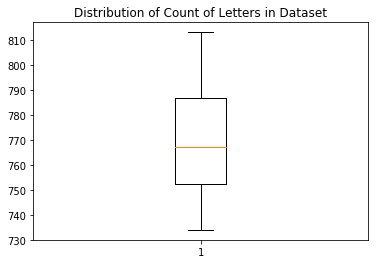

In [22]:
#Distribution of boxplot
total_distribution = distribution["letter count"]
plt.boxplot(total_distribution)
plt.title("Distribution of Count of Letters in Dataset")
plt.show()

In [5]:
#See data
data.head()

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [6]:
#Create factors and outcome variables.  Will use all non outcome columns as factors
X=data.drop("lettr",1)
Y=data["lettr"]

In [7]:
def score_and_time(model):
    print(cross_val_score(model, X, Y, cv=10))
    print("\nRuntime:")
    print("--- %s seconds ---" % (time.time() - start_time))

In [8]:
#Decision tree
start_time = time.time()
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',max_features=10,max_depth=18)
decision_tree.fit(X, Y)
score_and_time(decision_tree)

[ 0.89369101  0.88369781  0.88955224  0.87325349  0.87856072  0.86686687
  0.88264794  0.88303213  0.87380593  0.88626069]

Runtime:
--- 1.1559562683105469 seconds ---


In [9]:
start_time = time.time()
rfc = ensemble.RandomForestClassifier()
score_and_time(rfc)

[ 0.95131644  0.92793241  0.94676617  0.94161677  0.94102949  0.92492492
  0.94583751  0.94628514  0.93363499  0.92954202]

Runtime:
--- 2.5080692768096924 seconds ---


Random forest took twice as long but was a bit more accurate without any tuning required.  This could obviously cause issues as the data size increases.  